In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from pandas.plotting import table

C:\Users\kiera\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#import the leukaemia gene expression data set into a pandas data frame.
df = pd.read_csv(r"C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Learning from Data\Coursework\Data\Leukemia_GSE9476.csv",header=0)
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,PBSC_CD34,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,PBSC_CD34,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,PBSC_CD34,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,PBSC_CD34,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


In [4]:
#import the GPL96 data set into a pandas data frame.
GPL96 = pd.read_csv(r"C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Learning from Data\Coursework\Data\GPL96_limpo.txt",sep='\t', header=0)
GPL96

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,B. subtilis /GEN=thrC /DB_XREF=gb:X04603.1 /NO...,AFFX-ThrX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22279,AFFX-ThrX-M_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=thrC, thrB /DB_XREF=gb:X04603...",AFFX-ThrX-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22280,AFFX-TrpnX-3_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=trpC, trpF /DB_XREF=gb:K01391...",AFFX-TrpnX-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22281,AFFX-TrpnX-5_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=trpE, trpD /DB_XREF=gb:K01391...",AFFX-TrpnX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


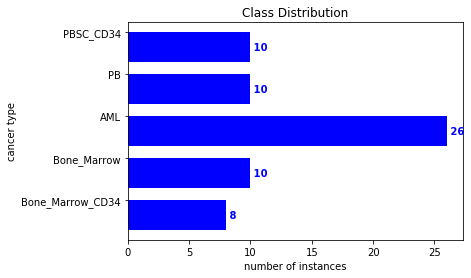

In [5]:
x = df.type.unique() #array of all leukaemia types.
y = [len(list(group)) for key, group in groupby(df.type)] #array containg the amount of observations for each type.

#plotting the above data as a bar plot.
fig, ax = plt.subplots()    
width = 0.70
ind = np.arange(len(y))  
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Class Distribution')
plt.xlabel('number of instances')
plt.ylabel('cancer type')   
for i, v in enumerate(y):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

In [6]:
#instantiation of leukaemia gene expression sub frames containing each leukaemia type.
BM_CD34 = df.loc[df['type'] == 'Bone_Marrow_CD34']
BM = df.loc[df['type'] == 'Bone_Marrow']
AML = df.loc[df['type'] == 'AML']
PB = df.loc[df['type'] == 'PB']
PBSC_CD34 = df.loc[df['type'] == 'PBSC_CD34']

In [7]:
#Function to return the values of a gene column for a certain gene ID.
def Col_values(df, gene_ID):
    data = df[gene_ID].values.tolist()
    return data

In [8]:
#Function that plots a box and whisker plot of the gene expression magnitudes of each leukaemia type for a certain gene.
def Boxplot(gene_ID):  
    data = [Col_values(BM_CD34, gene_ID), Col_values(BM, gene_ID), Col_values(AML, gene_ID), Col_values(PB, gene_ID), Col_values(PBSC_CD34, gene_ID)]
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(data)
    plt.title('Boxplot of Gene ID: ' + gene_ID)
    plt.xlabel('Leukemia Type')
    plt.ylabel('Gene Expression Magnitude')
    plt.xticks([1, 2, 3,4,5], ['Bone Marrow CD34', 'Bone Marrow', 'AML', 'PB', 'PBSC CD34'])
    plt.show()

C:\Users\kiera\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


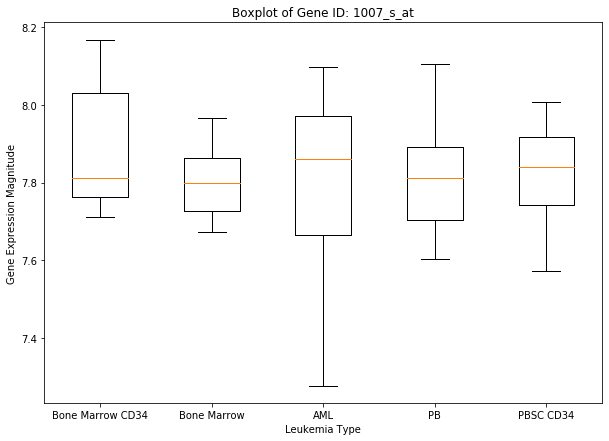

In [9]:
Boxplot('1007_s_at')

C:\Users\kiera\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


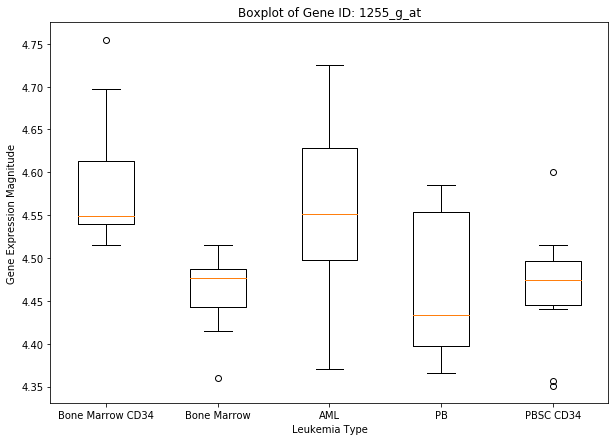

In [10]:
Boxplot('1255_g_at')

In [11]:
# Function that calculates the Kruskal-Wallis test value of gene expression magnitudes for a given gene.
def Kruskal_Wallis(gene_ID):
    result = stats.kruskal(Col_values(BM_CD34, gene_ID), Col_values(BM, gene_ID), Col_values(AML, gene_ID), Col_values(PB, gene_ID), Col_values(PBSC_CD34, gene_ID))
    return result

In [12]:
Kruskal_Wallis('1007_s_at')

KruskalResult(statistic=1.4165514053254356, pvalue=0.8413132611153437)

In [13]:
Kruskal_Wallis('1255_g_at')

KruskalResult(statistic=16.643409763313656, pvalue=0.0022668607310982886)

In [14]:
genes = df.columns[2:].astype(str) #Create an array containg all gene IDs.
statistic_list = []
p_value_list = []
for gene in genes: #For each gene in the data set calculate its Kruskal-Wallis statistic and p-value.
    statistic_list.append(Kruskal_Wallis(gene).statistic)
    p_value_list.append(Kruskal_Wallis(gene).pvalue)
kruskal_df = pd.DataFrame(list(zip(genes, statistic_list, p_value_list)), #Contain the statistic and p-values in a data frame.
                          columns =['Gene ID', 'Statistic', 'P Value'])
kruskal_df

,Gene ID,Statistic,P Value
0,1007_s_at,1.416551,0.841313
1,1053_at,26.823417,0.000022
2,117_at,29.065457,0.000008
3,121_at,19.724667,0.000566
4,1255_g_at,16.643410,0.002267
...,...,...,...
22278,AFFX-ThrX-5_at,16.163770,0.002807
22279,AFFX-ThrX-M_at,6.380087,0.172504
22280,AFFX-TrpnX-3_at,14.916501,0.004878
22281,AFFX-TrpnX-5_at,7.076361,0.131908


In [15]:
#Search the data frame for columns containing only a single value.
single_values = df.nunique()
to_drop = [i for i,v in enumerate(single_values) if v == 1]
print(to_drop)

[]


In [16]:
#Search the data frame for columns containing data with low variance.
to_drop = [i for i,v in enumerate(single_values) if (float(v)/df.shape[0]*100) < 1]
print(to_drop)


[]


In [17]:
#Search the data frame for duplicate rows.
dups = df.duplicated()
print(dups.any())

False


In [18]:
values = df.values 
features = values[:, 2:] #Set the model features.
targets = values[:, 1:2] #Set the model targets.
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, random_state=1) #Instantiate the training
                                                                                                     #and testing sets using a 
                                                                                                     # 50:50 split

Threshold = 0.00, Number of Features = 22283
Threshold = 0.05, Number of Features = 13508
Threshold = 0.10, Number of Features = 9529
Threshold = 0.15, Number of Features = 7379
Threshold = 0.20, Number of Features = 5854
Threshold = 0.25, Number of Features = 4706
Threshold = 0.30, Number of Features = 3868
Threshold = 0.35, Number of Features = 3245
Threshold = 0.40, Number of Features = 2737
Threshold = 0.45, Number of Features = 2365
Threshold = 0.50, Number of Features = 2067


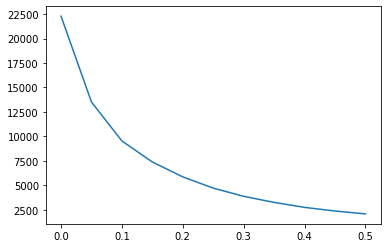

In [19]:
thresholds = arange(0.0, 0.55, 0.05) #Array of all thresholds for testing.
results = []
for i in thresholds: #For every threshold value calucate the number of features remaining after applying the threshold.
    vt = VarianceThreshold(threshold=i)
    X_sel = vt.fit_transform(features)
    n_features = X_sel.shape[1]
    print('Threshold = ' + str("%.2f" % i) + ', Number of Features = ' + str(n_features))
    results.append(n_features)
plt.plot(thresholds, results) #Plot the threshold value against number of remaining features.
plt.show()


In [ ]:
#Creation of a default MPL Classifier and calculation of its performance metrics.
perceptron = MLPClassifier(random_state = 1)
perceptron = perceptron.fit(x_train, y_train.ravel())
y_pred = perceptron.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)
print("Cohen Kappa:",metrics.cohen_kappa_score(y_test, y_pred))

In [ ]:
#Function that performs feature selection using ANOVA F-test and returns the new training and testing data.
def ANOVA(k, x_train, y_train, x_test):
    test_anova = SelectKBest(score_func=f_classif, k=k)
    test_anova.fit(x_train, y_train.ravel())
    x_train_anova = test_anova.transform(x_train)
    x_test_anova = test_anova.transform(x_test)
    return  test_anova, x_train_anova, x_test_anova

In [ ]:
test_anova, x_train_anova, x_test_anova = ANOVA(8, x_train, y_train, x_test) #ANOVA training and testing data.
scores_anova = test_anova.scores_ #ANOVA scores for every feature.
ANOVA_df = pd.DataFrame(list(zip(genes, scores_anova)), columns =['Gene ID', 'ANOVA F-Test Score'])
ANOVA_df = ANOVA_df.sort_values(['ANOVA F-Test Score'], ascending=[False]).head(n=8)
ANOVA_df #Display the top 8 features based on ANOVA score.

In [ ]:
#Plot the top 8 features based on ANOVA score as a bar graph.
fig = plt.figure(figsize =(10, 7))
plt.bar(ANOVA_df['Gene ID'].values, ANOVA_df['ANOVA F-Test Score'].values)
plt.title('ANOVA F-Test Scores for 8 Most Significant Features')
plt.xlabel('Gene ID')
plt.ylabel('ANOVA F-Test Score')

In [ ]:
#Creation of a default MPL Classifier using the ANOVA data set and calculation of its performance metrics.
perceptron = MLPClassifier(random_state = 1)
perceptron = perceptron.fit(x_train_anova, y_train.ravel())
y_pred_anova = perceptron.predict(x_test_anova)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_anova) * 100)
print("Cohen Kappa:",metrics.cohen_kappa_score(y_test, y_pred_anova))

In [ ]:
#Plot the default ANOVA MLP classifier confusion matrix.
confusion = metrics.confusion_matrix(y_test, y_pred_anova)
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('ANOVA MLP Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Function that performs feature selection using Mutual Inforamtion test and returns the new training and testing data.
def Mutual_Information(k, x_train, y_train, x_test):
    test_muinfo = SelectKBest(score_func=mutual_info_classif, k=k)
    test_muinfo.fit(x_train, y_train.ravel())
    x_train_muinfo = test_muinfo.transform(x_train)
    x_test_muinfo = test_muinfo.transform(x_test)
    return  test_muinfo, x_train_muinfo, x_test_muinfo

In [ ]:
test_muinfo, x_train_muinfo, x_test_muinfo = Mutual_Information(8, x_train, y_train, x_test) #MI training and testing data.
scores_muinfo = test_muinfo.scores_ #MI scores for every feature
muinfo_df = pd.DataFrame(list(zip(genes, scores_muinfo)), columns =['Gene ID', 'Mutual Information Score'])
muinfo_df = muinfo_df.sort_values(['Mutual Information Score'], ascending=[False])
muinfo_df #Display the top 8 features based on MI score.

In [ ]:
#Plot the top 8 features based on MI score as a bar graph.
fig = plt.figure(figsize =(15, 7))
plt.bar(muinfo_df['Gene ID'].values, muinfo_df['Mutual Information Score'].values)
plt.title('Mutual Information Scores for 8 Most Significant Features')
plt.xlabel('Gene ID')
plt.ylabel('Mutual Information Score')

In [ ]:
#Creation of a default MPL Classifier using the MI data set and calculation of its performance metrics.
perceptron = MLPClassifier(random_state = 1)
perceptron = perceptron.fit(x_train_muinfo, y_train.ravel())
y_pred_muinfo = perceptron.predict(x_test_muinfo)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_muinfo) * 100)
print("Cohen Kappa:",metrics.cohen_kappa_score(y_test, y_pred_muinfo))

In [ ]:
#Plot the default MI MLP classifier confusion matrix.
confusion = metrics.confusion_matrix(y_test, y_pred_muinfo)
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('Mutual Information MLP Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Creation of anMPL Classifier using the MI data set with 2000 max iterations.
perceptron = MLPClassifier(max_iter = 2000, random_state = 1random_state = 1)
perceptron = perceptron.fit(x_train_muinfo, y_train.ravel())
y_pred_muinfo = perceptron.predict(x_test_muinfo)

In [ ]:
param_distributions = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], #Search space
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'alpha': [0.0001, 0.05],
}
cv_grid = GridSearchCV(perceptron, param_distributions, n_jobs=-1, cv=3, verbose=2) #Grid search cross validation.
cv_grid.fit(x_train_anova, y_train.ravel())
cv_grid.best_params_ #Print hyperparameters chosen by the grid search

In [ ]:
#Creation of a MPL Classifier using the MI data set and tuned hyperparameters and calculation of its performance metrics.
perceptron = MLPClassifier(activation = 'tanh', alpha = 0.005, hidden_layer_sizes = (100,), random_state = 1)
perceptron = perceptron.fit(x_train_muinfo, y_train.ravel())
y_pred_muinfo = perceptron.predict(x_test_muinfo)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_muinfo) * 100)
print("Cohen Kappa:",metrics.cohen_kappa_score(y_test, y_pred_muinfo))

In [ ]:
#Plot the tuned MI MLP classifier confusion matrix.
confusion = metrics.confusion_matrix(y_test, y_pred_muinfo)
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('Final MLP Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Creation of a default Decision Tree Classifier using the MI data set and calculation of its performance metrics.
decision_tree = DecisionTreeClassifier(random_state = 1)
decision_tree = decision_tree.fit(x_train_muinfo, y_train.ravel())
y_pred_muinfo = decision_tree.predict(x_test_muinfo)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_muinfo) * 100)
print("Cohen Kappa:",metrics.cohen_kappa_score(y_test, y_pred_muinfo))

In [ ]:
param_distributions = {'criterion': ['gini', 'entropy'], #Search space
            'splitter': ['random', 'best'],
            'max_depth': [4, 8, 32],
}
cv_grid = GridSearchCV(decision_tree, param_distributions, n_jobs=-1, cv=3, verbose=2) #Grid search cross validation.
cv_grid.fit(x_train_muinfo, y_train)
cv_grid.best_params_ #Print hyperparameters chosen by the grid search

In [ ]:
#Creation of a tuned MI Decision Tree Classifier and calculation of its performance metrics.
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, splitter = 'random', random_state = 1)
decision_tree = decision_tree.fit(x_train_muinfo, y_train.ravel())
y_pred_muinfo = decision_tree.predict(x_test_muinfo)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_muinfo) * 100)
print("Cohen Kappa:",metrics.cohen_kappa_score(y_test, y_pred_muinfo))

In [ ]:
#Plot the tuned MI Decision Tree classifier confusion matrix.
confusion = metrics.confusion_matrix(y_test, y_pred_muinfo)
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('Final Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
selected_genes = muinfo_df['Gene ID'].head(n=8).tolist() #Array containg gene IDs of selected features.
selected_genes

In [ ]:
pd.set_option("display.max_colwidth", None) #Increase data frame column width
gene_info = GPL96.loc[GPL96['ID'].isin(selected_genes)] #Extract all selected features from GPL96 data frame.
gene_info = gene_info.drop(['GB_ACC', 'SPOT_ID', 'Annotation Date', #Drop unnecessary columns
                            'Target Description', 'Representative Public ID', 
                            'ENTREZ_GENE_ID', 'RefSeq Transcript ID'], axis = 1)
gene_info #Display gene info